# Document Question Answering

Natural PDF includes document QA functionality that allows you to ask natural language questions about your PDFs and get relevant answers. This feature uses LayoutLM models to understand both the text content and the visual layout of your documents.

## Setup

Let's start by loading a sample PDF to experiment with question answering.

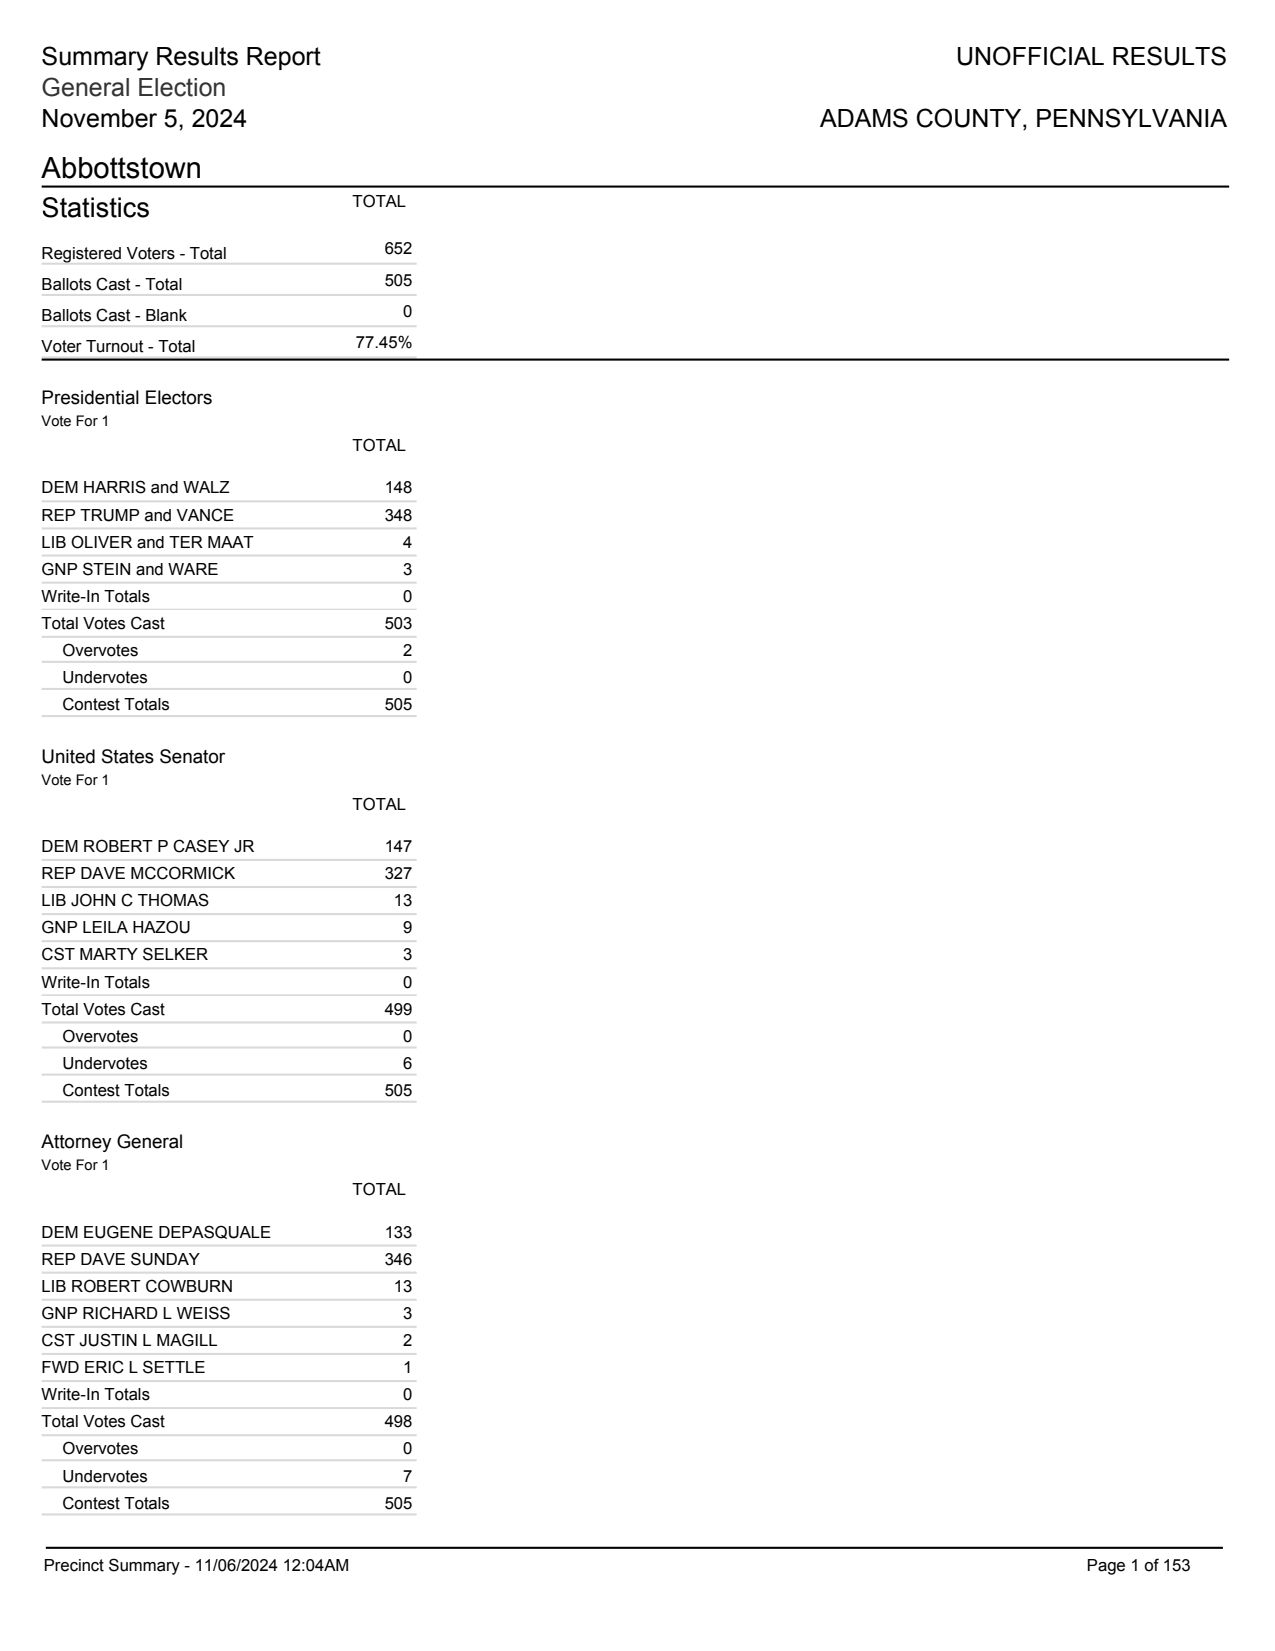

In [1]:
from natural_pdf import PDF

# Path to sample PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/0500000US42001.pdf")

# Display the first page
page = pdf.pages[0]
page.show()

## Basic Usage

Here's how to ask questions to a PDF page:

In [2]:
# Ask a question about the entire document
page.ask("How many votes did Harris and Waltz get?")

Device set to use mps


{'question': 'How many votes did Harris and Waltz get?',
 'answer': '148',
 'confidence': 0.9994352459907532,
 'start': 21,
 'end': 21,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

In [3]:
page.ask("Who got the most votes for Attorney General?")

{'question': 'Who got the most votes for Attorney General?',
 'answer': 'DEM EUGENE DEPASQUALE',
 'confidence': 0.9823383688926697,
 'start': 64,
 'end': 64,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

In [4]:
page.ask("Who was the Republican candidate for Attorney General?")

{'question': 'Who was the Republican candidate for Attorney General?',
 'answer': 'LIB ROBERT COWBURN',
 'confidence': 0.34796959161758423,
 'start': 68,
 'end': 68,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

## Asking questions to part of a page questions

You can also ask questions to a specific *region of* a page*:

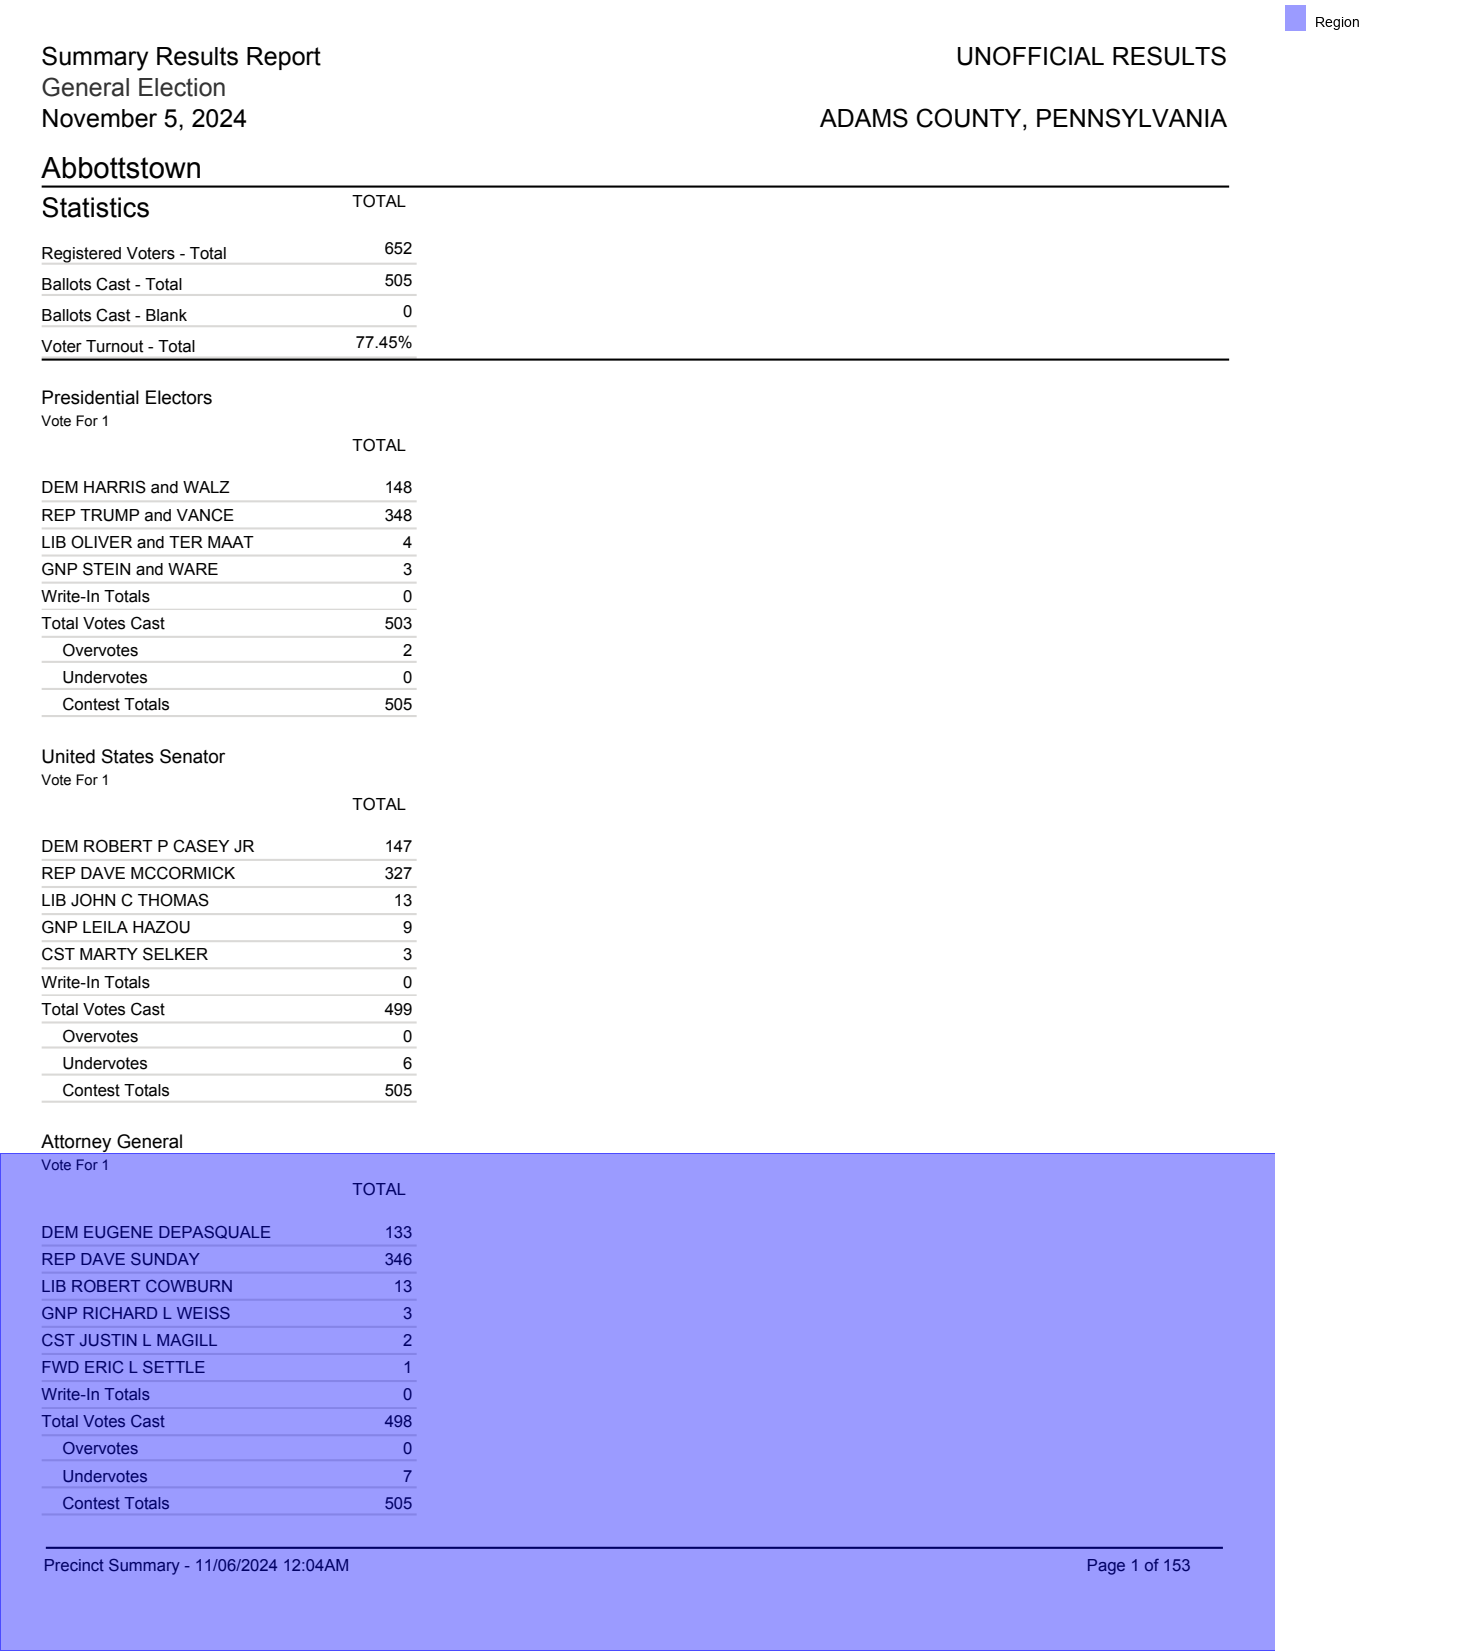

In [5]:
# Get a specific page
region = page.find('text:contains("Attorney General")').below()
region.show()

In [6]:
region.ask("How many write-in votes were cast?")

{'question': 'How many write-in votes were cast?',
 'answer': '498',
 'confidence': 0.9988918304443359,
 'start': 17,
 'end': 17,
 'found': True,
 'region': <Region bbox=(0, 553.663, 612, 792)>,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

## Asking multiple questions

In [7]:
import pandas as pd

questions = [
    "How many votes did Harris and Walz get?",
    "How many votes did Trump get?",
    "How many votes did Natural PDF get?",
    "What was the date of this form?"
]

# You can actually do this but with multiple questions
# in the model itself buuuut Natural PDF can'd do it yet
results = [page.ask(q) for q in questions]

df = pd.json_normalize(results)
df

,question,answer,confidence,start,end,found,page_num,source_elements
0,How many votes did Harris and Walz get?,148,0.999612,21,21,True,0,[<TextElement text='148' font='Helvetica' size...
1,How many votes did Trump get?,348,0.820931,23,23,True,0,[<TextElement text='348' font='Helvetica' size...
2,How many votes did Natural PDF get?,"November 5, 2024",0.957622,4,4,True,0,[<TextElement text='November 5...' font='Helve...
3,What was the date of this form?,"November 5, 2024",0.996624,4,4,True,0,[<TextElement text='November 5...' font='Helve...


## Visualizing where answers come from

Sometimes you'll want to see exactly where the model found an answer in your document. Maybe you're checking if it grabbed the right table cell, or you want to verify it didn't confuse similar-looking sections.

DEM EUGENE DEPASQUALE


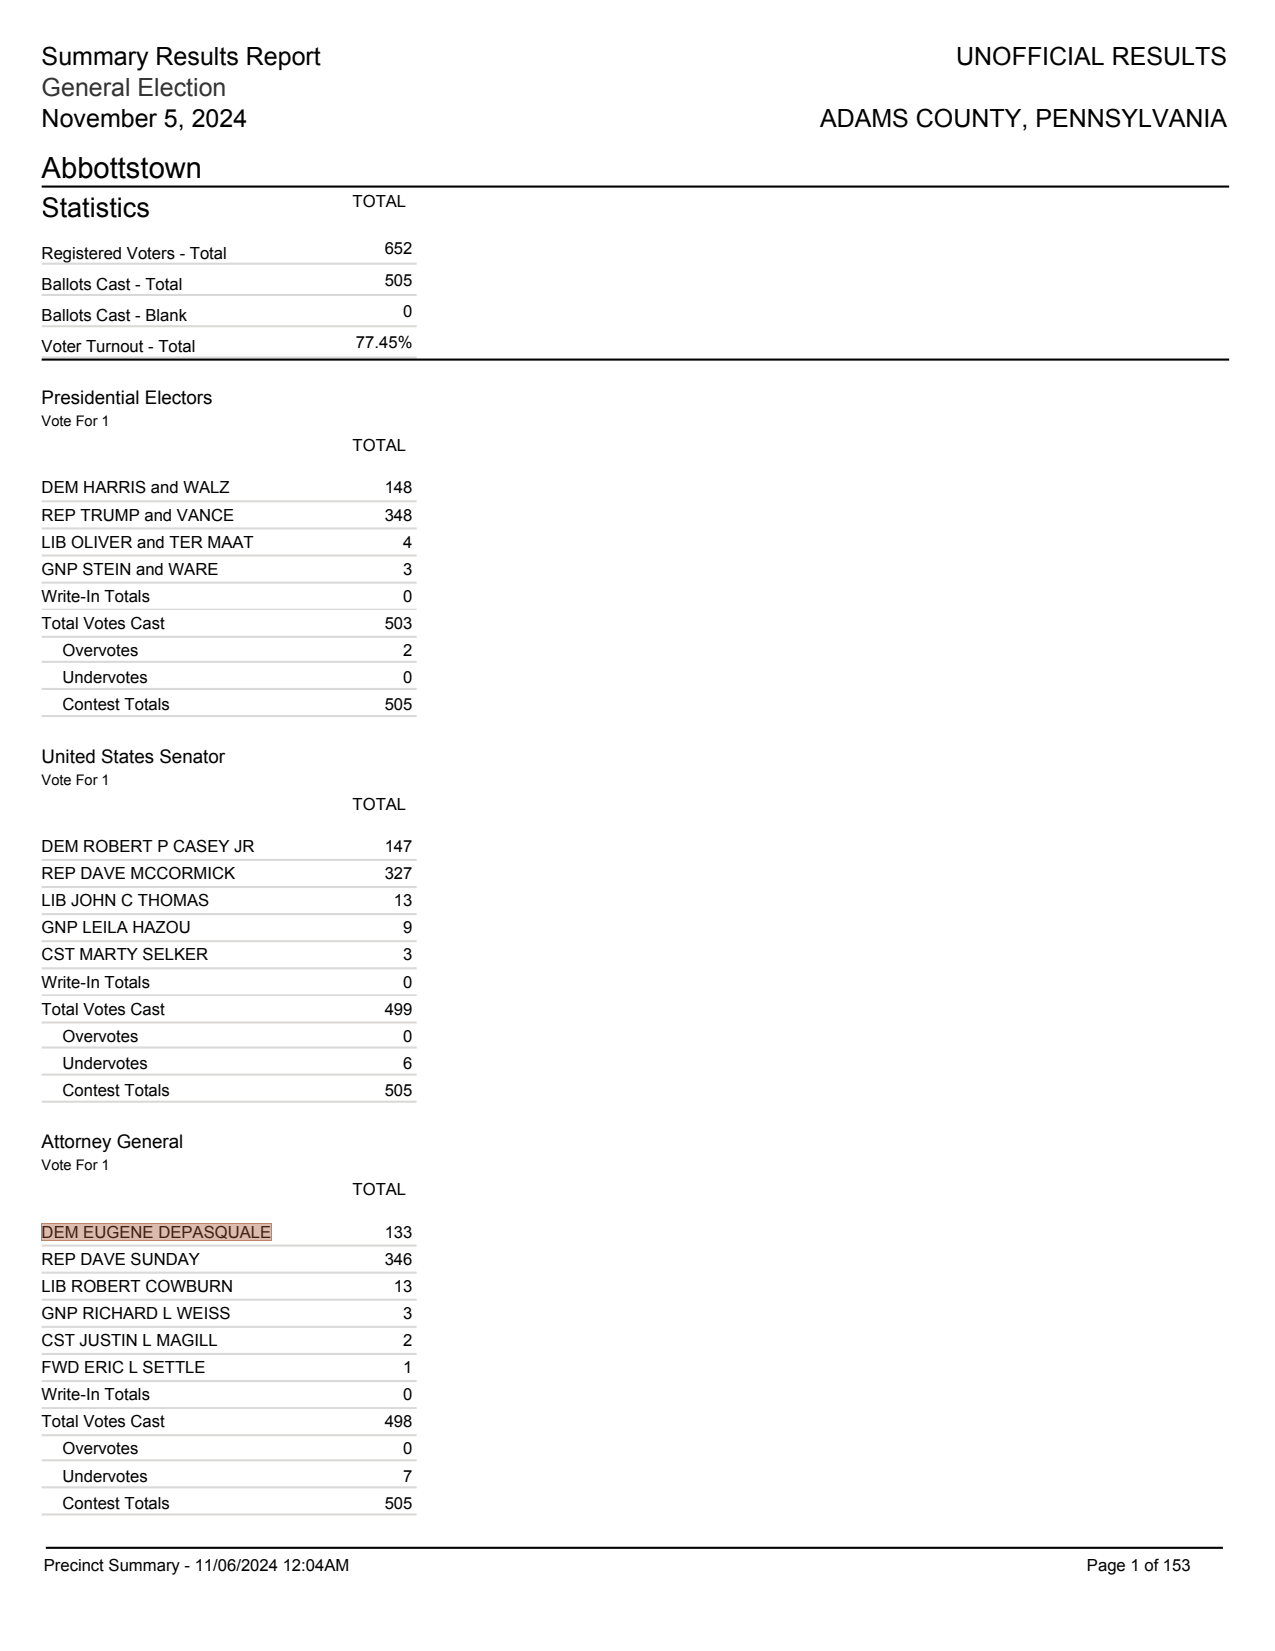

In [8]:
result = page.ask("Who got the most votes for Attorney General?")

# See the answer
print(result.answer)  # "John Smith"

# Show exactly where it found that answer
result.show()

The `result.show()` method highlights the specific text elements the model used to answer your question - super helpful for debugging or when you need to double-check the results.

You can also access result data like a normal dictionary or use dot notation if you prefer:

In [9]:
# Both of these work the same way
print(result["confidence"])  # 0.97
print(result.confidence)     # 0.97

0.9823383688926697
0.9823383688926697


If the model couldn't find a confident answer, `result.found` will be `False` and calling `result.show()` will let you know there's nothing to visualize.

## Next Steps

Now that you've learned about document QA, explore:

- [Element Selection](../element-selection/index.ipynb): Find specific elements to focus your questions.
- [Layout Analysis](../layout-analysis/index.ipynb): Automatically detect document structure.
- [Working with Regions](../regions/index.ipynb): Define custom areas for targeted questioning.
- [Text Extraction](../text-extraction/index.ipynb): Extract and preprocess text before QA.